In [23]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
from glob import glob
import random
import matplotlib.pyplot as plt

In [24]:
def draw_vertical_lines(image, n, line_color=(255, 0, 0), line_width=1, font_size=40):
    draw = ImageDraw.Draw(image)
    width, height = image.size
    font = ImageFont.load_default() 
    step = width / n
    number_colors = [(0, 0, 255), (0, 255, 0), (255, 165, 0), (128, 0, 128), (0, 255, 255)] 

    for i in range(1, n):  # Exclude the first and last edges
        x = int(i * step)
        draw.line([(x, 0), (x, height)], fill=line_color, width=line_width)

    for i in range(n):
        num_x = int((i + 0.5) * step)  # Center in the region
        num_y = height // 2  # Vertically centered
        num_color = random.choice(number_colors)  # Choose a random color
        text = str(i + 1)
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        draw.text((num_x - text_width // 2, num_y - text_height // 2), text, fill=num_color, font=font)

    return image


def merge_left_right(limg, rimg):
    
    width = min(limg.width, rimg.width)
    _,height = limg.size
    limg = limg.crop((0, 0, width, height))
    _,height = rimg.size
    rimg = rimg.crop((0, 0, width, height))
    
    stacked_img = Image.new("RGB", (width, limg.height + rimg.height))
    stacked_img.paste(rimg.rotate(180), (0, 0))
    stacked_img.paste(limg, (0, rimg.height))
    
    return stacked_img

def stack_images_vertically(images):
    min_width = min(img.width for img in images)
    images = [img.crop((0, 0, min_width, img.height)) for img in images]
    
    total_height = sum(img.height for img in images)
    stacked_img = Image.new("RGB", (min_width, total_height))
    
    y_offset = 0
    for img in images:
        stacked_img.paste(img, (0, y_offset))
        y_offset += img.height

    return stacked_img

def see_all_plants(fname, s=8, e=61):
    limgs = sorted(glob(f'data/train/{fname}/{fname}_L_*.png'))
    rimgs = sorted(glob(f'data/train/{fname}/{fname}_R_*.png'))
    
    lims = [Image.open(i) for i in limgs][s:e]
    rims = [Image.open(i) for i in rimgs][s:e]
    
    ims = []
    for l,r in zip(lims, rims):
        i = merge_left_right(l,r)
        ims.append(i)
    
    return stack_images_vertically(ims)

In [25]:
train = pd.read_csv('Train.csv')
train.head()

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
0,ID_826322_Lbmaya,A6dzrkjqvl,3,L,33,42,0.9,IITA-TMS-IBA000070,Early
1,ID_718181_Bslpwx,Ypktwvqjbn,7,L,33,41,1.5,IBA154810,Early
2,ID_465762_L1n61d,Ox18ob0syv,4,R,21,28,2.7,IBA980581,Early
3,ID_626872_Pbmx2e,Hqcekwpxgu,2,R,30,39,2.6,IITA-TMS-IBA000070,Early
4,ID_518846_Opko8c,Ummqfuetoc,1,R,17,26,2.7,IBA980581,Early


In [26]:
train.FolderName.value_counts().head()

FolderName
Rzyf8hal4j    10
Tbhppxjkvr    10
Yznlv6wrsh    10
Kjvcz6bjfj    10
Ah4ubi4ggi     8
Name: count, dtype: int64

(903, 280)


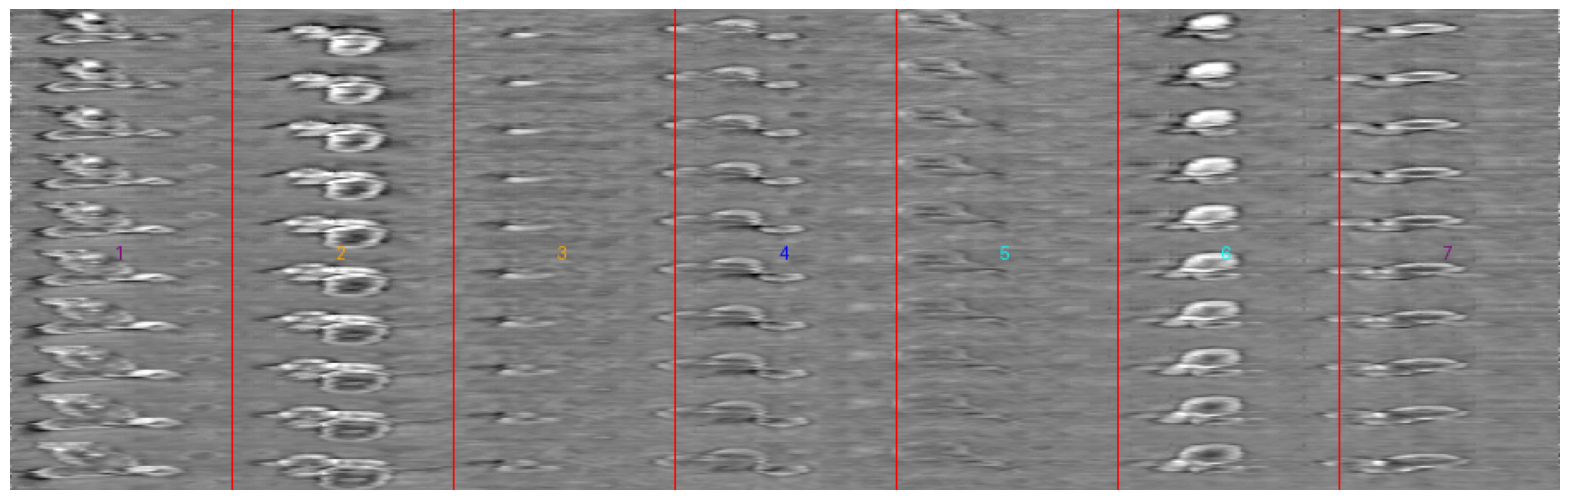

In [27]:
folders = train.FolderName.value_counts().index.values
folder = folders[0]
folder = 'Idiolerx47'
img = see_all_plants(folder, s=20, e=30)
img = draw_vertical_lines(img, n=7)
print(img.size)
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')  # Turn off the axes
plt.show()